<img style="float: right;" src="https://www.bentoli.com/wp-content/uploads/2017/07/CommercialFarming-1.jpg", width= "350">  
  
# Data Cleaning & Wrangling Exercise
  
---  
  
**By: Heather M. Steich, M.S.**  
**Date: March 3$^{rd}$, 2018**  
**Written in: Python 3.4.5**  

In [1]:
import sys
print(sys.version)

3.4.5 | packaged by conda-forge | (default, Sep  8 2016, 14:36:52) [MSC v.1600 64 bit (AMD64)]


---  
  
## Setup

You’ll find three csv files attached: 
 - `toy_orgs.csv` - information on **farms**  
 - `toy_yields.csv` - information on **crop yields**  
 - `toy_fields.csv` - information on **fields**  


---  
  
## Your Task

1. This data is messy! First check the following expectations:
 - We expect yield data to have one yield per org, year, field
 - We expect there to be one measure of area (acreage) per field
 - If there are problems, what’s the extent? 
 - How would you summarize this for our Customer Success or Product teams?  
  
2. Examine crop yield/harvest data quality  
 - Acknowledging that you may not have in-depth subject knowledge in agriculture, looking at the data provided how would you define data quality in this case?

---  
  
## Initial Preparation  
  
 - Load analytic libraries  
 - Establish plot formatting  
 - Load the data  
  

This submission was created with a Jupyter Notebook.  There are no special instructions for running the code, as long as one has all the required libraries installed.  All of the utilized Python libraries and visualization templates are included in the following code block; once run successfully, the rest of the notebook should run and compile without difficulty.  Since these libraries are all open source, I've included links to the source documentation for each below.  
  

 - Data wrangling & processing:  
    - [NumPy](http://www.numpy.org/)  
    - [pandas](https://pandas.pydata.org/pandas-docs/stable/)  
  

 - Plotting:  
    - [matplotlib](https://matplotlib.org/contents.html)  
    - [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)  
    - [seaborn](https://seaborn.pydata.org/)  
    

 - Remove warning messages:  
    - [warnings](https://docs.python.org/3.1/library/warnings.html)  
    - [warnings.filterwarnings('ignore')](https://docs.python.org/3.1/library/warnings.html#warnings.filterwarnings)  
  

Although I did not specifically reference on each plot, I did utilize [ColorBrewer2](http://colorbrewer2.org/) on several occasions when selecting colors from color palates that work well together and are color blind friendly.

In [2]:
### LOAD LIBRARIES ###


# Data wrangling & processing: 
import numpy as np
import pandas as pd


# Plotting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Remove warning messages:
import warnings
warnings.filterwarnings('ignore')

In [3]:
### ESTABLISH PLOT FORMATTING ###


#mpl.rcdefaults()  # Resets plot defaults

def plt_format():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (16, 10)
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.markerscale'] = 4
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['axes.linewidth'] = 1

#plt.rcParams.keys()  # Available rcParams
plt_format()

In [4]:
## LOAD DATA ###


# Read in the CSV files:
orgs = pd.read_csv('./data/orgs.csv')
yields = pd.read_csv('./data/yields.csv')
fields = pd.read_csv('./data/fields.csv')


# Print dimensions & column names of the datasets:
print('Farm table dimensions: ', orgs.shape)
print('  Farm table column names: ', orgs.columns.values)
print('\nYield table dimensions: ', yields.shape)
print('  Yield table column names: ', yields.columns.values)
print('\nField table dimensions: ', fields.shape)
print('  Field table column names: ', fields.columns.values)

Farm table dimensions:  (21, 2)
  Farm table column names:  ['grower' 'organization_id']

Yield table dimensions:  (417, 7)
  Yield table column names:  ['crop_type' 'year' 'harvest_product' 'total_harvested' 'harvested_unit'
 'field_id' 'org_id']

Field table dimensions:  (417, 5)
  Field table column names:  ['field_id' 'org_id' 'year' 'field_area' 'field_area_unit']


---  
  
## 1a. Data Validation One
  
 - Yield data should have ***one*** yield per:
   - org
   - year
   - field

In [5]:
### ASSESS YIELD TABLE ###  


# Check for completely duplicated rows:
print('Number of completely duplicated rows: ', yields.duplicated().sum())


# Create a feature that counts the number of yields per 'org_id', 
# 'year', 'field_id' combination:
yields['yield_counts'] = yields.groupby(['org_id', 'year', 'field_id']).cumcount()+1


# Extract a data subset containing duplicated 'org_id', 'year', 
# 'field_id' combinations, keeping all instances:
yield_dups = yields[yields.duplicated(['org_id', 'year', 'field_id'], keep=False)]


# Print analyses findings:
print("\nNumber of unique 'org_id', 'year', 'field_id' combinations with > 1 yield (INCLUDING the first instance): ", 
      yield_dups.shape[0])
print("Percentage of the Yields Table that contains duplicates (INCLUDING the first instance): %.2f" % 
      (yield_dups.shape[0]/yields.shape[0]*100),'%\n')
print("Number of unique 'org_id', 'year', 'field_id' combinations with > 1 yield (EXCLUDING the first instance): ", 
      yield_dups[yield_dups.yield_counts > 1].shape[0])
print("Percentage of the Yields Table that contains duplicates (EXCLUDING the first instance): %.2f" % 
      (yield_dups[yield_dups.yield_counts > 1].shape[0]/yields.shape[0]*100),'%\n')
print("Number of unique organization ID's that provided the duplicated yield information: ", 
      len(yield_dups.org_id.unique()))


# Report formal outcome of hypothesis:
if yields.yield_counts.max() == 1:
    print('\n - Reject the alternative hypotheses that "The yield data has more than one yield per org, year, field."', 
          '\n - Accept the null hypotheses: "The yield data to has one yield per org, year, field."')          
else:
    print('\n - Reject the null hypotheses that "The yield data to has one yield per org, year, field."', 
          '\n - Accept the alternative hypotheses: "The yield data has more than one yield per org, year, field."\n')


# View the duplicate records:
yield_dups.iloc[:, [1, 5, 6, 7]].sort_values(['org_id', 'year', 'field_id'])
yield_dups.sort_values(['org_id', 'year', 'field_id'])

Number of completely duplicated rows:  0

Number of unique 'org_id', 'year', 'field_id' combinations with > 1 yield (INCLUDING the first instance):  48
Percentage of the Yields Table that contains duplicates (INCLUDING the first instance): 11.51 %

Number of unique 'org_id', 'year', 'field_id' combinations with > 1 yield (EXCLUDING the first instance):  33
Percentage of the Yields Table that contains duplicates (EXCLUDING the first instance): 7.91 %

Number of unique organization ID's that provided the duplicated yield information:  6

 - Reject the null hypotheses that "The yield data to has one yield per org, year, field." 
 - Accept the alternative hypotheses: "The yield data has more than one yield per org, year, field."



,crop_type,year,harvest_product,total_harvested,harvested_unit,field_id,org_id,yield_counts
102,CROP.SOYBEAN.COMMERCIAL,2014,grain,9155.537097,bu,7918c722bf8c5bf47d3f06ab61ee7f16c90a2887,106e6791d0f181b391cde800e74fdc14d529dc0a,1
225,CROP.CORN.COMMERCIAL,2014,grain,67743.991590,bu,7918c722bf8c5bf47d3f06ab61ee7f16c90a2887,106e6791d0f181b391cde800e74fdc14d529dc0a,2
49,CROP.CORN.COMMERCIAL,2015,grain,65070.435110,bu,295f94fd307065b54d72fd025e8b476510592c9b,106e6791d0f181b391cde800e74fdc14d529dc0a,1
162,CROP.CORN.COMMERCIAL,2015,grain,52615.153270,bu,295f94fd307065b54d72fd025e8b476510592c9b,106e6791d0f181b391cde800e74fdc14d529dc0a,2
266,CROP.CORN.COMMERCIAL,2015,grain,140762.056400,bu,6c72c2cb8ac35f84e4cab5d22a9eb3c2e5783e69,106e6791d0f181b391cde800e74fdc14d529dc0a,1
310,CROP.CORN.COMMERCIAL,2015,grain,61618.195060,bu,6c72c2cb8ac35f84e4cab5d22a9eb3c2e5783e69,106e6791d0f181b391cde800e74fdc14d529dc0a,2
404,CROP.CORN.COMMERCIAL,2015,grain,72642.027750,bu,6c72c2cb8ac35f84e4cab5d22a9eb3c2e5783e69,106e6791d0f181b391cde800e74fdc14d529dc0a,3
199,CROP.CORN.COMMERCIAL,2016,grain,50857.544430,bu,6c72c2cb8ac35f84e4cab5d22a9eb3c2e5783e69,106e6791d0f181b391cde800e74fdc14d529dc0a,1
245,CROP.CORN.COMMERCIAL,2016,grain,59249.685070,bu,6c72c2cb8ac35f84e4cab5d22a9eb3c2e5783e69,106e6791d0f181b391cde800e74fdc14d529dc0a,2
292,CROP.CORN.COMMERCIAL,2017,grain,134799.103100,bu,d8af4f1c279187449da52e16a27539c9ce1344d2,2498aa02bfe5084932147db868715faf88ffcb41,1


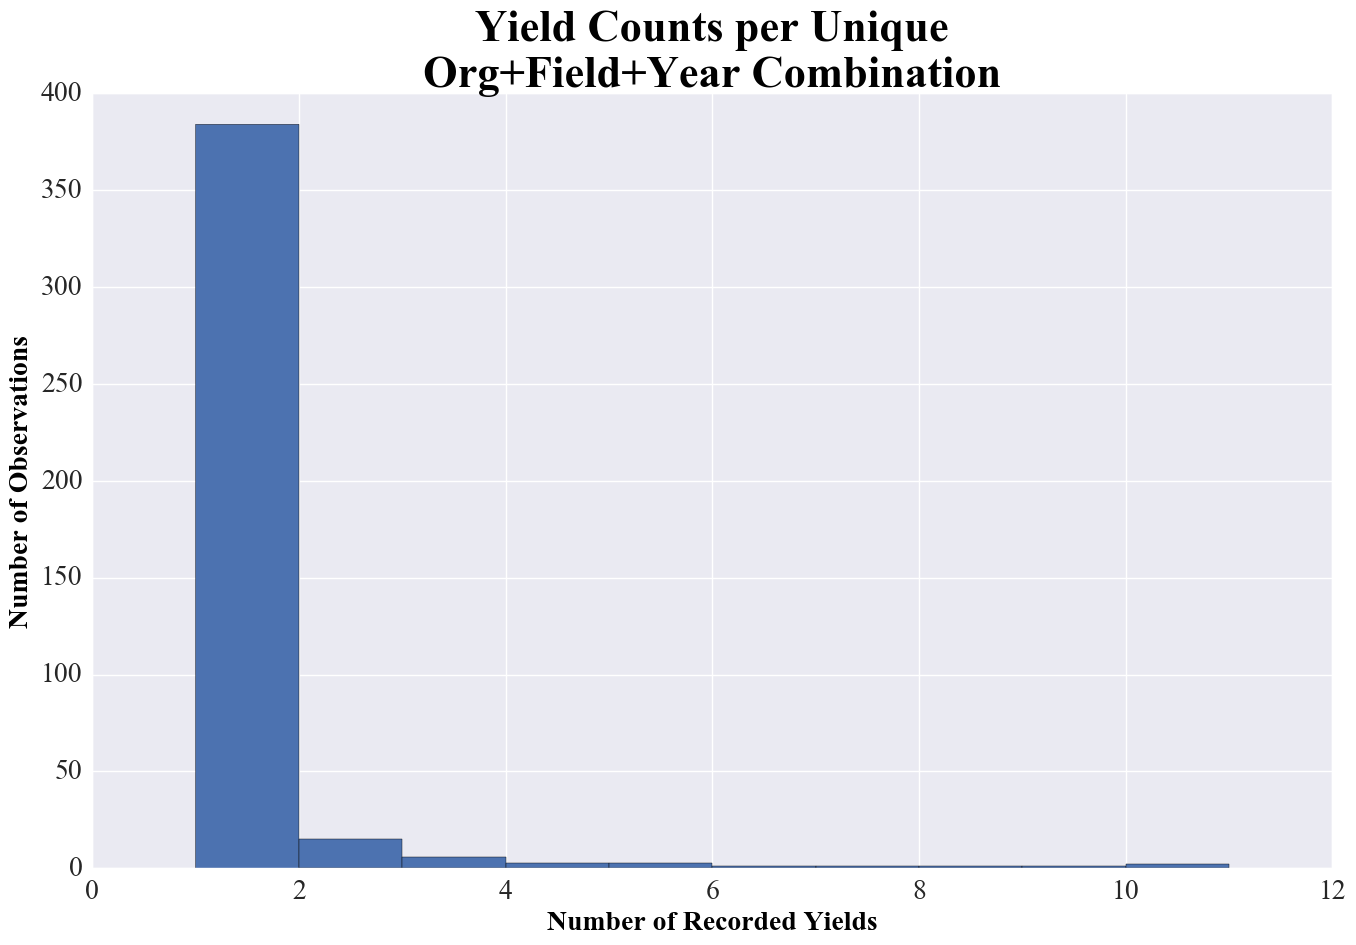

In [6]:
### YIELD TABLE PLOTS ###

# Load pre-specified plot format:
plt_format()

plt.hist(yields.yield_counts)
plt.title('Yield Counts per Unique\nOrg+Field+Year Combination')
plt.xlabel('Number of Recorded Yields')
plt.ylabel('Number of Observations');

---  
  
## 1b. Data Validation Two  
  
 - There should be ***one*** measure of area (acreage) per field

In [7]:
### ASSESS FIELD TABLE ###  


# Check for completely duplicated rows:
print('Number of completely duplicated rows: ', fields.duplicated().sum())


# Check for unique measurement units in 'field_area_unit':
print('Unique field measurement units: ', fields.field_area_unit.unique())
### NOTE: Had their been more than one unit of measure, we would need to validate 
###       if duplicate field measurements were actually the same but in different 
###       units.  The area values would need to be converted to the other units to 
###       compare if the actual area measurement is the same or not (meaning, the 
###       measurement numbers are different, but once the units are converted, the 
###       area measurements are the same).  Since the only unit used is 'acre', we 
###       can skip this extra step.


# Create a feature that counts the number of acreage measurement per 'field_id':
fields['area_counts'] = fields.groupby('field_id')['field_area'].cumcount()+1


# Extract a data subset containing 'field_id' values with more than one 
# specified 'field_area', keeping all instances:
area_dups = fields[fields.field_id.isin(
    fields[fields.area_counts > 1].field_id.unique())]


# Print analyses findings:
print("\nNumber of unique 'field_id' values in the entire Field Table: ", 
      len(fields.field_id.unique()))
print("Number of unique 'field_id' values > 1 area: ", 
      len(area_dups.field_id.unique()))
print("Percentage of the 'field_id' values that contain > 1 area per field: %.2f" % 
      (len(area_dups.field_id.unique())/len(fields.field_id.unique())*100),'%')
print('Maximum number of area measurements for one unique field_id: ', 
      fields.area_counts.max(), '\n')
print("Number of unique organization ID's that provided the duplicated field information: ", 
      len(area_dups.org_id.unique()))


# Report formal outcome of hypothesis:
if fields.area_counts.max() == 1:
    print('\n - Reject the alternative hypotheses that "There is more than one measure of area (acreage) per field."', 
          '\n - Accept the null hypotheses: "There is one measure of area (acreage) per field."')          
else:
    print('\n - Reject the null hypotheses that "There is one measure of area (acreage) per field."', 
          '\n - Accept the alternative hypotheses: "There is more than one measure of area (acreage) per field."\n')

    
# View the duplicate records:
area_dups.sort_values(['field_id', 'area_counts'])

Number of completely duplicated rows:  0
Unique field measurement units:  ['acre']

Number of unique 'field_id' values in the entire Field Table:  270
Number of unique 'field_id' values > 1 area:  91
Percentage of the 'field_id' values that contain > 1 area per field: 33.70 %
Maximum number of area measurements for one unique field_id:  21 

Number of unique organization ID's that provided the duplicated field information:  8

 - Reject the null hypotheses that "There is one measure of area (acreage) per field." 
 - Accept the alternative hypotheses: "There is more than one measure of area (acreage) per field."



,field_id,org_id,year,field_area,field_area_unit,area_counts
137,00ed44d041d6b0f8a538b2815fdb34b2dcee329c,598d17ec200eeb9e27ae829746ccf47c57761bc1,2017,548.764229,acre,1
169,00ed44d041d6b0f8a538b2815fdb34b2dcee329c,598d17ec200eeb9e27ae829746ccf47c57761bc1,2015,298.069184,acre,2
319,00ed44d041d6b0f8a538b2815fdb34b2dcee329c,598d17ec200eeb9e27ae829746ccf47c57761bc1,2016,367.176503,acre,3
178,04aa2c573e5e029dc25c2a5ed84df869f5ef7ec6,106e6791d0f181b391cde800e74fdc14d529dc0a,2016,202.071990,acre,1
335,04aa2c573e5e029dc25c2a5ed84df869f5ef7ec6,106e6791d0f181b391cde800e74fdc14d529dc0a,2015,262.762377,acre,2
25,075041a114b9768612d10b7ea78b3d8cba71521c,598d17ec200eeb9e27ae829746ccf47c57761bc1,2017,196.393965,acre,1
223,075041a114b9768612d10b7ea78b3d8cba71521c,598d17ec200eeb9e27ae829746ccf47c57761bc1,2015,344.586665,acre,2
327,075041a114b9768612d10b7ea78b3d8cba71521c,598d17ec200eeb9e27ae829746ccf47c57761bc1,2016,521.341796,acre,3
121,0cc1b0a8c09d8bb4ba14b926e63e5ad590c159b4,598d17ec200eeb9e27ae829746ccf47c57761bc1,2016,142.168728,acre,1
181,0cc1b0a8c09d8bb4ba14b926e63e5ad590c159b4,598d17ec200eeb9e27ae829746ccf47c57761bc1,2015,532.698249,acre,2


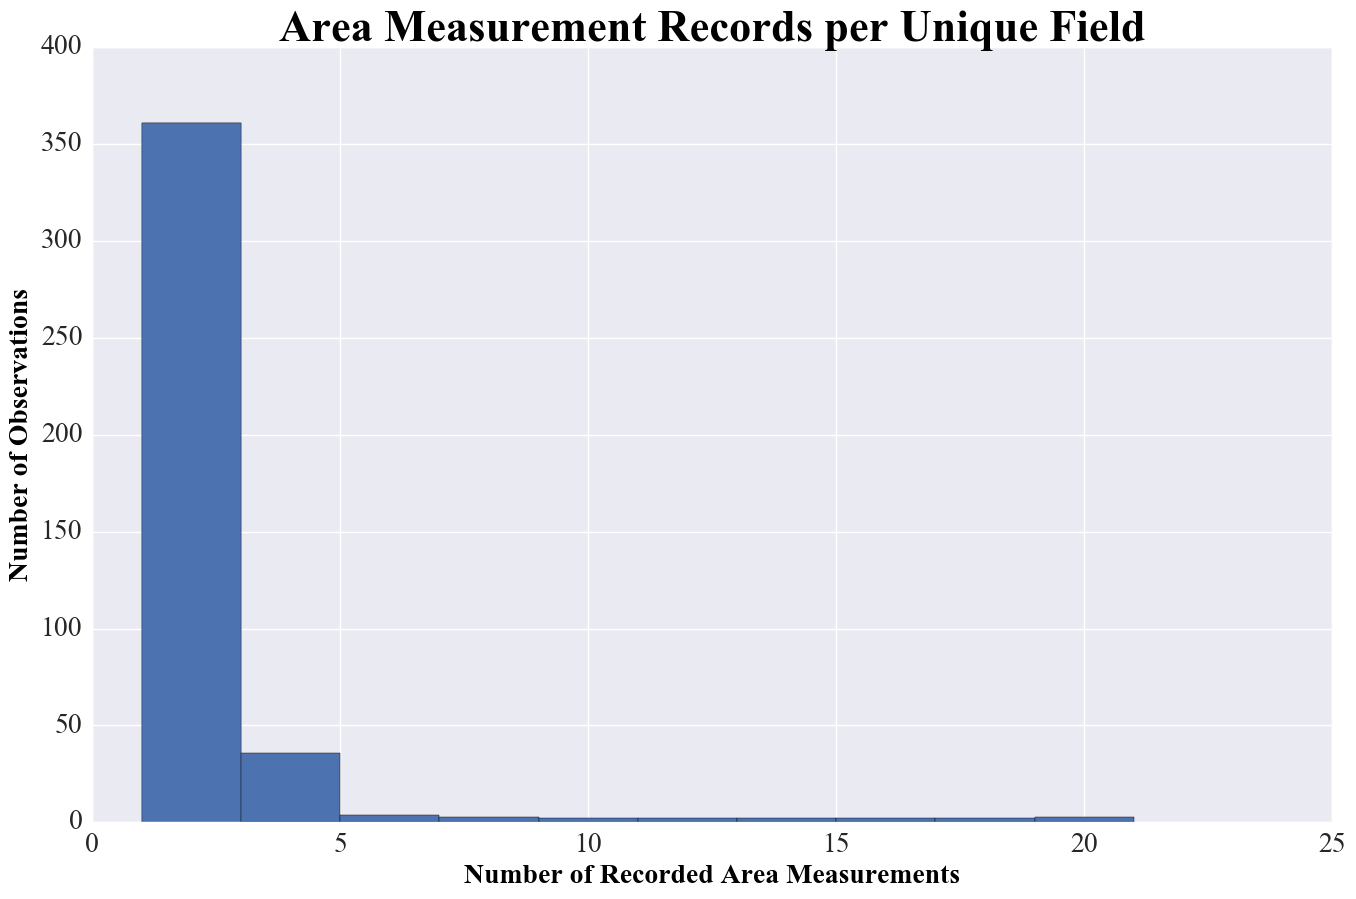

In [8]:
### FIELD TABLE PLOTS ###

# Load pre-specified plot format:
plt_format()

plt.hist(fields.area_counts)
plt.title('Area Measurement Records per Unique Field')
plt.xlabel('Number of Recorded Area Measurements')
plt.ylabel('Number of Observations');

> ***NOTE: Had their been more than one unit of measure, we would need to validate if duplicate field measurements were actually the same but in different units.  The area values would need to be converted to the other units to compare if the actual area measurement is the same or not (meaning, the measurement numbers are different, but once the units are converted, the area measurements are the same).  Since the only unit used is 'acre', we can skip this extra step.***

---  
  
## 1c. Data Validation Question One  
  
 - What is the extent of the problems?  

> **Answer:**  
  
#### Yield Table
> It is expected that each unique organization, field and year combinations can only have one yield record, as you've specified.  
  
> I found that of the 417 record in the Yield Table, 48 records (about 12%) were duplicated, which includes the firsst instances for these organization, field and year combinations.  Without the first instance, there is about 8% of the data that are duplicated.
  
> The duplicated yield information can be traced back to 6 distinct organizations.  
  
> - Number of unique 'org_id', 'year', 'field_id' combinations with > 1 yield (INCLUDING the first instance):  48  
> - Percentage of the Yields Table that contains duplicates (INCLUDING the first instance): 11.51 %  
> - Number of unique 'org_id', 'year', 'field_id' combinations with > 1 yield (EXCLUDING the first instance):  33  
> - Percentage of the Yields Table that contains duplicates (EXCLUDING the first instance): 7.91 %  
> - Number of unique organization ID's that provided the duplicated yield information:  6  
  

#### Field Table
> It is expected that each unique field can only have one area measurement, unless there is some sort of field sectioning or loss of area mid-year due to sale or natural disaster.  For simplicity here, you've specified that each field should only have one area measurement, in acres.  
  
> I found that of the 270 unique fields available in the data, 91 had more than one area measurement (approximately $\frac{1}{3}$).  Furthermore, the maximum number of area measurements given for one field was 21.  
  
> The duplicated field measurements can be traced back to 8 distinct organizations.  
  
> - Number of unique 'field_id' values in the entire Field Table:  270  
> - Number of unique 'field_id' values > 1 area:  91  
> - Percentage of the 'field_id' values that contain > 1 area per field: 33.70 %  
> - Maximum number of area measurements for one unique field_id:  21  
> - Number of unique organization ID's that provided the duplicated field information:  8


---  
  
## 1d. Data Validation Question Two 
  
 - How would you summarize this for our Customer Success or Product teams?  

> **Answer:**  
> Thank you for bringing forward this data from the clients.  I have some questions about some of the measurements.  It seems that about $\frac{1}{3}$ of the unique fields have more than one measurement of area.  This would be like saying your house is 1,000 square feet and then telling me tomorrow that the same house is 2,000 square feet.  The reason that this is a problem is because when calculating the fields' annual yields, the area is very important.  We don't want to make a mistake and report that a field produced twice as much than it really did, for example.  Yet, we don't want to dismiss this data, as perhaps the area measurements belong to other fields, and we need that information to calculated the respective yields for those fields.  Unless I'm not understanding something correctly about this dataset, it seems that fields are measured differently.  
  
> Is there a possible explanation for this?  
> - Are fields measured more than once?  
> - Is there a chance that some of the `field_id`'s in the data were duplicated when they should have been unique?  
  
> I understand that you may not know these answers specifically.  I have traced back the fields with multiple area measurements to 8 distinct organizations.  Perhaps we could work out a way to cycle back with these clients to double-check these errors on their end.  
  
> Do you have any questioms?  

---  
  
## 2a. Data Quality Analysis 
  
 - Examine the crop yield/harvest data quality.

In [9]:
### ASSESS CROP YIELD DATA ###

### DEFINITION: Crop yield is typically measured in bushels per acre.

# One field belongs to 2 organizations:
a = pd.DataFrame(yields.groupby(['year', 'field_id'])['org_id'].nunique())
b=(np.where(yields.groupby(['year', 'field_id'])['org_id'].nunique() > 1))[0]
c = a.iloc[b,:].reset_index().field_id[0]
yields[yields.field_id == c]

,crop_type,year,harvest_product,total_harvested,harvested_unit,field_id,org_id,yield_counts
19,CROP.CORN.COMMERCIAL,2015,grain,10585.85949,bu,3ecb07dfe2886a452d827ba5be310bef04548353,2a7365d841e79f504f0c5c55267a87f501e4d1e4,1
63,CROP.CORN.COMMERCIAL,2015,grain,131033.93310,bu,3ecb07dfe2886a452d827ba5be310bef04548353,0966e34316e39217e4f26fbe20fc14e24c26567b,1


In [10]:
### ASSESS CROP YIELD DATA ###

### DEFINITION: Crop yield is typically measured in bushels per acre.

# There are 4 records with more than one crop planted in one field+org+year combination:
pd.DataFrame(yields.groupby(['org_id', 'year', 'field_id', 'crop_type'])['total_harvested'].sum())
d = pd.DataFrame(yields.groupby(['field_id', 'org_id', 'year'])['crop_type'].nunique())
e = ((np.where(yields.groupby(['field_id', 'org_id', 'year'])['crop_type'].nunique() > 1))[0])
d.iloc[e, :]

,,,crop_type
field_id,org_id,year,
17ba0791499db908433b80f37c5fbc89b870084b,fe62dee029474d52346542845674529025594056,2015,2
790456c61a24b82fdf2acd866fe9722919cb6358,726cce9d9800d792d1e0fbb83923ac4c6be4f668,2015,2
7918c722bf8c5bf47d3f06ab61ee7f16c90a2887,106e6791d0f181b391cde800e74fdc14d529dc0a,2014,2
b712ac1d4550a50dba54876abbfa22112c7e67fa,2ec53b20e3a9f6ff73d290ef3e8e8f30a2a30235,2017,2


**Notes:**  

 - **yeilds** = ['org_id', 'field_id', 'year', 'total_harvested', 'crop_type', 'harvest_product', 'harvested_unit', 'yield_counts']  

**total_harvested = main unit of interest**  
**crop_type = two unique values to consider separately - 'corn' & 'soybean'**  
harvest_product = only unique value is 'grain'  
harvested_unit = only unique value is 'bu' (the abreviation for "bushel")  
yield_counts = the engineered feature I created  
  

 - **fields** = ['org_id', 'field_id', 'year', 'field_area', 'field_area_unit', 'area_counts']  

**field_area = main unit of interest**  
field_area_unit = only unique value is 'acre'  
area_counts = the engineered feature I created  

---  
  
## 2b. Data Quality Question  
  
 - Acknowledging that you may not have in-depth subject knowledge in agriculture, looking at the data provided, how would you define data quality in this case?  
  
> **Answer:**  
> By definition, a crop yield is measured in bushels per acre.  I had planned on merging the data sets nicely to show plots and distributions of yields, but due to the duplicated data, I was not able to pull this off in time.  
  
> I would say that the data quality is managable.  There are no missing values, no completely duplicated rows, no invalid entries.  However, before proceding, the duplicate records need to be addressed by removing them, summarazing them (by taking the mean, median or sum values) or flagging them as unique and analyzing them separately.
  
> Here are two other findings I came across:
  
 - One field belongs to 2 organizations.  
 - There are 4 records with more than one crop planted in one field+org+year combination.  

---  
  
## 3. Summary Write-up (aimed at a *non-technical* audience)  
  
> **Summary Write-Up:**  
> #### Yield Table
> It is expected that each unique organization, field and year combinations can only have one yield record, as you've specified.  
  
> I found that of the 417 record in the Yield Table, 48 records (about 12%) were duplicated, which includes the firsst instances for these organization, field and year combinations.  Without the first instance, there is about 8% of the data that are duplicated.
  
> The duplicated yield information can be traced back to 6 distinct organizations.  
  
> - Number of unique 'org_id', 'year', 'field_id' combinations with > 1 yield (INCLUDING the first instance):  48  
> - Percentage of the Yields Table that contains duplicates (INCLUDING the first instance): 11.51 %  
> - Number of unique 'org_id', 'year', 'field_id' combinations with > 1 yield (EXCLUDING the first instance):  33  
> - Percentage of the Yields Table that contains duplicates (EXCLUDING the first instance): 7.91 %  
> - Number of unique organization ID's that provided the duplicated yield information:  6  
  

#### Field Table
> It is expected that each unique field can only have one area measurement, unless there is some sort of field sectioning or loss of area mid-year due to sale or natural disaster.  For simplicity here, you've specified that each field should only have one area measurement, in acres.  
  
> I found that of the 270 unique fields available in the data, 91 had more than one area measurement (approximately $\frac{1}{3}$).  Furthermore, the maximum number of area measurements given for one field was 21.  
  
> The duplicated field measurements can be traced back to 8 distinct organizations.  
  
> - Number of unique 'field_id' values in the entire Field Table:  270  
> - Number of unique 'field_id' values > 1 area:  91  
> - Percentage of the 'field_id' values that contain > 1 area per field: 33.70 %  
> - Maximum number of area measurements for one unique field_id:  21  
> - Number of unique organization ID's that provided the duplicated field information:  8
  
  
***NOTE: Had their been more than one unit of measure, we would need to validate if duplicate field measurements were actually the same but in different units.  The area values would need to be converted to the other units to compare if the actual area measurement is the same or not (meaning, the measurement numbers are different, but once the units are converted, the area measurements are the same).  Since the only unit used is 'acre', we can skip this extra step.***  

Thank you for bringing forward this data from the clients.  I have some questions about some of the measurements.  It seems that about $\frac{1}{3}$ of the unique fields have more than one measurement of area.  This would be like saying your house is 1,000 square feet and then telling me tomorrow that the same house is 2,000 square feet.  The reason that this is a problem is because when calculating the fields' annual yields, the area is very important.  We don't want to make a mistake and report that a field produced twice as much than it really did, for example.  Yet, we don't want to dismiss this data, as perhaps the area measurements belong to other fields, and we need that information to calculated the respective yields for those fields.  Unless I'm not understanding something correctly about this dataset, it seems that fields are measured differently.  
  
> Is there a possible explanation for this?  
> - Are fields measured more than once?  
> - Is there a chance that some of the `field_id`'s in the data were duplicated when they should have been unique?  
  
> I understand that you may not know these answers specifically.  I have traced back the fields with multiple area measurements to 8 distinct organizations.  Perhaps we could work out a way to cycle back with these clients to double-check these errors on their end.  
  
> Do you have any questioms?  

By definition, a crop yield is measured in bushels per acre.  I had planned on merging the data sets nicely to show plots and distributions of yields, but due to the duplicated data, I was not able to pull this off in time.  
  
> I would say that the data quality is managable.  There are no missing values, no completely duplicated rows, no invalid entries.  However, before proceding, the duplicate records need to be addressed by removing them, summarazing them (by taking the mean, median or sum values) or flagging them as unique and analyzing them separately.
  
> Here are two other findings I came across:
  
 - One field belongs to 2 organizations.  
 - There are 4 records with more than one crop planted in one field+org+year combination.  

In [11]:
orgs.head()


,grower,organization_id
0,Cavanaugh Farm,fe62dee029474d52346542845674529025594056
1,Depner Farm,106e6791d0f181b391cde800e74fdc14d529dc0a
2,Austin Farm,0966e34316e39217e4f26fbe20fc14e24c26567b
3,Batte Farm,513612757cd6094d98b6a82a01d6f115fe9ae88c
4,Sifuentes Farm,2ec53b20e3a9f6ff73d290ef3e8e8f30a2a30235


In [12]:
orgs.apply(pd.Series.nunique)

grower             21
organization_id    21
dtype: int64

In [13]:
yields.head()

,crop_type,year,harvest_product,total_harvested,harvested_unit,field_id,org_id,yield_counts
0,CROP.CORN.COMMERCIAL,2016,grain,53290.62885,bu,cb1e3bd821dd673a0c378b16ba97075919aa993a,0966e34316e39217e4f26fbe20fc14e24c26567b,1
1,CROP.CORN.COMMERCIAL,2014,grain,40073.82155,bu,58d04a7094c1b08e9856932a02104d2a36b7b8ce,726cce9d9800d792d1e0fbb83923ac4c6be4f668,1
2,CROP.CORN.COMMERCIAL,2015,grain,45528.03394,bu,5e3babe7b318f4245ceb16718665af0b54335443,598d17ec200eeb9e27ae829746ccf47c57761bc1,1
3,CROP.SOYBEAN.COMMERCIAL,2015,grain,13927.33228,bu,02dc3fe6f889f3ece8daf456d26464d381bc9e55,fe62dee029474d52346542845674529025594056,1
4,CROP.CORN.COMMERCIAL,2014,grain,59676.63487,bu,109e500b323e0ef7baadd4409830c7619d8cfbfa,fe62dee029474d52346542845674529025594056,1


In [14]:
fields.head()

,field_id,org_id,year,field_area,field_area_unit,area_counts
0,cb1e3bd821dd673a0c378b16ba97075919aa993a,0966e34316e39217e4f26fbe20fc14e24c26567b,2016,307.185719,acre,1
1,58d04a7094c1b08e9856932a02104d2a36b7b8ce,726cce9d9800d792d1e0fbb83923ac4c6be4f668,2014,213.680671,acre,1
2,5e3babe7b318f4245ceb16718665af0b54335443,598d17ec200eeb9e27ae829746ccf47c57761bc1,2015,160.063342,acre,1
3,02dc3fe6f889f3ece8daf456d26464d381bc9e55,fe62dee029474d52346542845674529025594056,2015,194.621312,acre,1
4,109e500b323e0ef7baadd4409830c7619d8cfbfa,fe62dee029474d52346542845674529025594056,2014,269.088511,acre,1
